In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
datau=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/z1989new30.nc')
U = datau.variables['psi'][:]/1000000
U[U <0] = np.nan

In [3]:
datau=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0300-01.UVEL.nc')
plotvaru = datau.variables['UVEL']
lontu = datau.variables['ULONG'][:,:]
lattu = datau.variables['ULAT'][:,:]

LON = lontu[0:600,200:2000]
LAT = lattu[0:600,200:2000]
LON[LON == -1.0] = np.nan
LAT[LAT == -1.0] = np.nan

In [4]:
        # Pick some of the nicer colors from the palette...
        nice_cmap=plt.get_cmap('jet')
        lev_cmap = nice_cmap([10,20,30,40,50,60,70,80,90,100,110,120,140,150,160,170,180,190,200,240])
        #new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
        new_cmap = cols.ListedColormap(lev_cmap,"jet")
        nice_levels = [-60000000,-50000000,-40000000,-30000000,-20000000,-10000000,0,5000000,10000000,13000000,16000000,17000000,23000000,25000000]
        nice_levels = [0,2,4,6,8,10,11,12,13]
        #colorlevel = [0,20,40,60,80,100]
        norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


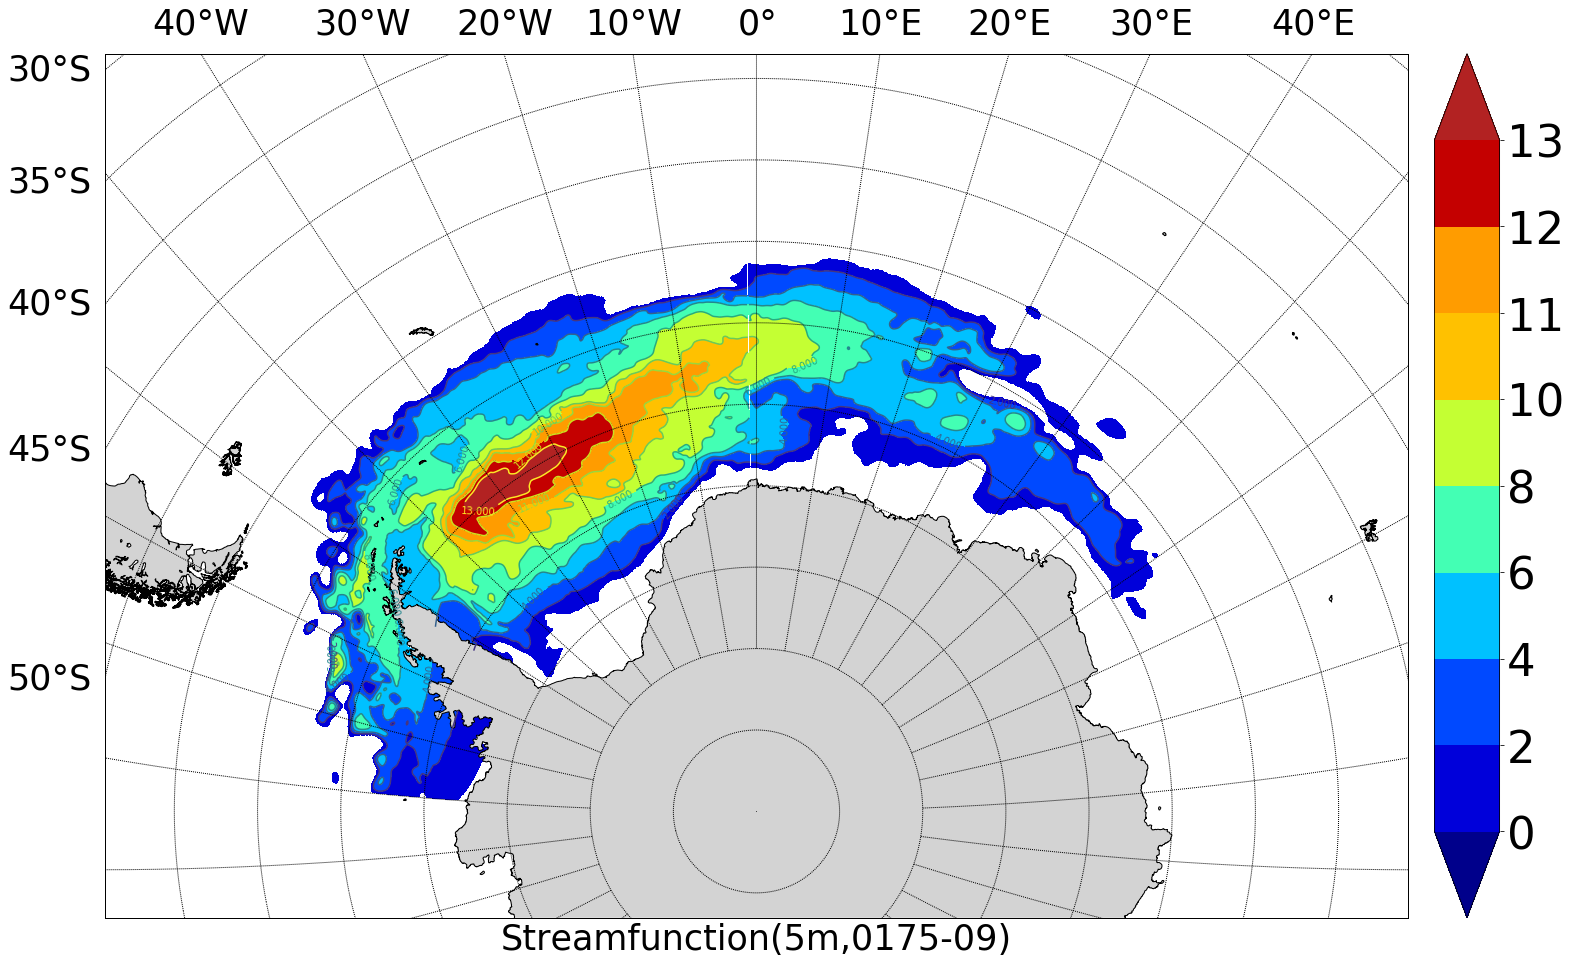

In [5]:
plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'35'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -70, lon_0 = 0,area_thresh = 100,\
                     width = 8900000,height = 5900000,resolution ='h') 
#############################################
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(LON,LAT)
#lw = 5*U / U.max()

CP = map.contourf(x,y,U,cmap = new_cmap,levels = nice_levels,extend='both')
MP = map.contour(x,y,U,levels = nice_levels)
plt.clabel(MP, inline=1, fontsize=10)
CP.cmap.set_over('firebrick')
CP.cmap.set_under('darkblue')
cbar =map.colorbar(CP,extendfrac='auto')
cbar.ax.tick_params(labelsize=45)
plt.xlabel("Streamfunction(5m,0175-09)",**my_font)
plt.savefig("Stream3000.png")

In [6]:
LON

array([[  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [-89.9, -89.8, -89.7, ...,  89.8,  89.9,  90. ],
       [-89.9, -89.8, -89.7, ...,  89.8,  89.9,  90. ],
       [-89.9, -89.8, -89.7, ...,  89.8,  89.9,  90. ]])